### This is a notebook to read in the flight data and get the stats on it
### For Sam (:

In [50]:
#import stuff
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
#make sure to put an r before the string
data_file_path = r'/Users/joshuacurie/my_files/GW/dbf1920/11-2 Flight Data/FL1_data_cleaned.csv'

In [11]:
#this reads in the data
df_fd = pd.read_csv(data_file_path)

In [56]:
df_fd.columns

Index(['time', 'heading', 'pitch', 'roll', 'xaccel', 'yaccel', 'zaccel',
       'temp', 'pressure', 'altitude'],
      dtype='object')

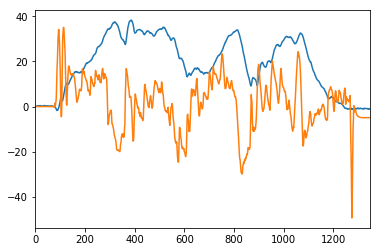

In [4]:
df_fd.altitude.plot()
df_fd.pitch.plot()

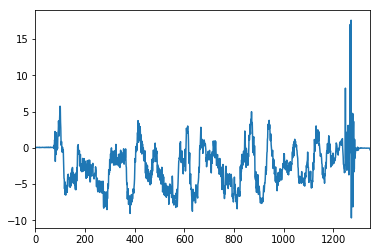

In [24]:
df_fd.xaccel.plot()

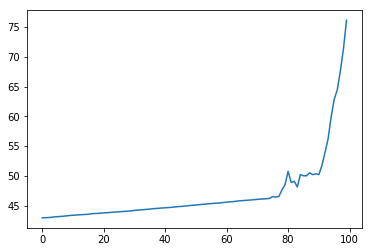

In [21]:
xaccel_smol = df_fd.xaccel.iloc[0:100]
xvelocity = []

#do a mock intergral
for observation in xaccel_smol:
    new_area = observation
    total_area = new_area+total_area
    xvelocity.append(total_area)
    
plt.plot(xvelocity)
plt.show()

In [46]:
def get_pos(xaccel):
    xvelocity = []
    total_vel = 0

    #do a mock intergral velocity
    for obs in range(1, len(xaccel)):
        i = xaccel[obs]
        i_minus_1 = xaccel[obs-1]
        new_area = .5*(i-i_minus_1)
        total_vel = total_vel + new_area
        xvelocity.append(total_vel)

    xpos = []
    total_pos = 0

    #do a mock intergral position
    for obs in range(1, len(xvelocity)):
        i = xvelocity[obs]
        i_minus_1 = xvelocity[obs-1]
        new_area = .5*(i-i_minus_1)
        total_pos = total_pos+new_area
        xpos.append(total_pos)
    return xpos, xvelocity

In [47]:
xaccel = df_fd.xaccel
yaccel = df_fd.yaccel
zaccel = df_fd.zaccel
xpos, xvelocity = get_pos(xaccel)
ypos, yvelocity = get_pos(yaccel)
zpos, zvelocity = get_pos(zaccel)

In [40]:
len(xpos) == len(ypos)

True

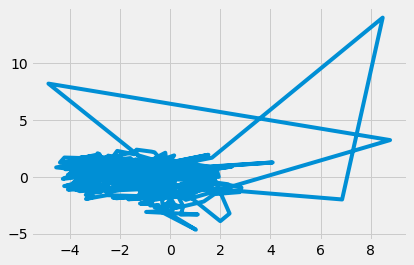

In [51]:
plt.plot(xvelocity, yvelocity)

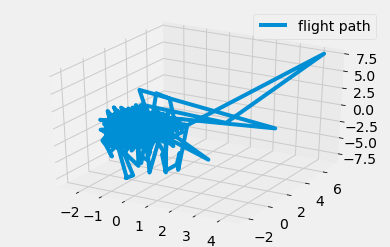

In [54]:
fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.array(zpos)
x = np.array(xpos)
y = np.array(ypos)
ax.plot(x, y, z, label='flight path')
ax.legend()
plt.show()

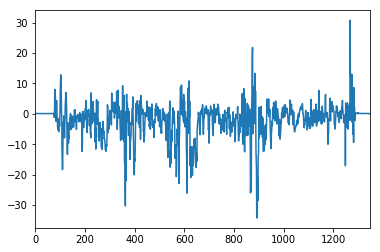

In [41]:
df_fd.zaccel.plot()

In [42]:
intermediate = np.trapz(np.array(df_fd.zaccel.iloc[230:235]), np.array(df_fd.yaccel.iloc[230:235]))

In [43]:
intermediate

-0.513849999999999

In [44]:
Axes3D.plot(np.array(df_fd.xaccel), np.array(df_fd.yaccel), np.array(df_fd.zaccel))


AttributeError: 'numpy.ndarray' object has no attribute 'has_data'

In [45]:
#shows the data
df_fd.head()

,time,heading,pitch,roll,xaccel,yaccel,zaccel,temp,pressure,altitude
0,0.0,127.39,0.0,0.0,0.04,0.01,0.10,61.96,1014.29,0.00
1,0.1,127.39,0.0,0.0,0.04,0.01,0.12,61.96,1014.29,0.05
2,0.2,127.39,0.0,0.0,0.02,0.02,0.08,61.96,1014.29,0.01
3,0.3,127.39,0.0,0.0,0.05,0.01,0.09,61.96,1014.29,0.00
4,0.4,127.39,0.0,0.0,0.06,0.02,0.11,61.96,1014.30,0.11


In [46]:
# This will run it automatically if you set it up right
file_names = ['FL1_data_cleaned.csv', 'FL2_data_cleaned.csv', 'FL3_data_cleaned.csv']
file_path_to_files = r'/Users/joshuacurie/my_files/GW/dbf1920/11-2 Flight Data/'

In [47]:
list_flights_data = []

#function adds all of the flight data into a list (a list of dataframes)
for file_name in file_names:
    data_file_path = file_path_to_files + file_name
    df_temp = pd.read_csv(data_file_path)
    list_flights_data.append(df_temp)

In [48]:
#function to get the stats of the data
def get_stats(df_fd,col):
    avg = df_fd[col].mean()
    stdev = df_fd[col].std()
    maxx = df_fd[col].max()
    minn = df_fd[col].min()
    fun_time = {'col':col, 'avg':avg, 'stdev':stdev, 'max':maxx, 'min':minn}
    return fun_time

In [49]:
#this prints out all of the data you need
flights_data = {}
count = 0
for flight in list_flights_data:
    count = count + 1
    cols = flight.columns
    temp_flight_data = []
    for col in cols:
        temp_flight_data.append(get_stats(flight, col))
    flights_data[f'flight{count}'] = temp_flight_data

In [58]:
#this prints out all of the data you need
flights_data = []
count = 0
for flight in list_flights_data:
    count = count + 1
    cols = flight.columns
    data_point = []
    avgs = []
    stdevs = []
    maxx = []
    minn = []
    for col in cols:
        temp_flight_data = get_stats(flight, col)
        data_point.append(temp_flight_data['col'])
        avgs.append(temp_flight_data['avg'])
        stdevs.append(temp_flight_data['stdev'])
        maxx.append(temp_flight_data['max'])
        minn.append(temp_flight_data['min'])
    df_temp = pd.DataFrame({'Data Point':data_point, 
                            'Avg':avgs, 
                            'Standard Deviation':stdevs, 
                            'Maximum Value': maxx, 
                            'Minimum Value':minn
                           })
    
    df_temp.to_csv(f'/Users/joshuacurie/my_files/GW/dbf1920/11-2 Flight Data/FL{count}_summary_data.csv', index=False)
    
    

In [50]:
# This shows you how to access the data

In [51]:
# Which flight do you want?
flight_number = 3

#dont change this lol
dict_name = f'flight{flight_number}'

In [52]:
#tada! This gives you all of the data for that specific flight
flights_data[dict_name]

[{'col': 'time',
  'avg': 73.45158503401359,
  'stdev': 42.45218481916174,
  'max': 146.9000000000001,
  'min': 0.0},
 {'col': 'heading',
  'avg': 169.2107142857141,
  'stdev': 102.87147507598547,
  'max': 359.35,
  'min': 0.18},
 {'col': 'pitch',
  'avg': 3.0307210884353757,
  'stdev': 12.285589920614862,
  'max': 48.7,
  'min': -30.770000000000003},
 {'col': 'roll',
  'avg': 68.42421088435385,
  'stdev': 109.98423794564249,
  'max': 358.7000000000001,
  'min': -0.9900000000000092},
 {'col': 'xaccel',
  'avg': -2.043544217687079,
  'stdev': 3.0485054909138634,
  'max': 18.2,
  'min': -8.98},
 {'col': 'yaccel',
  'avg': 0.20685714285714257,
  'stdev': 1.9762447077719398,
  'max': 28.85,
  'min': -10.17},
 {'col': 'zaccel',
  'avg': -2.6707074829931985,
  'stdev': 5.265897352264531,
  'max': 21.54,
  'min': -33.29},
 {'col': 'temp',
  'avg': 65.0921972789117,
  'stdev': 1.6944765518425233,
  'max': 68.99,
  'min': 63.43},
 {'col': 'pressure',
  'avg': 1009.4230204081682,
  'stdev': 1.36

In [54]:
flights = []
for i in range(1, 4):
    temp_data = flights_data[f'flight{i}']
    

1
2
3
